In [53]:
import random
import math
from typing import List
import numpy as np
import matplotlib.pyplot as plt
from hashSuggested import hash_A
from rhoSuggested import rho



In [54]:

def f(x, m_fit):
    res1 = ((x*0xbc164501) & 0x7fffffff) >> m_fit
    return res1


A = [0x21ae4036,
    0x32435171,
    0xac3338cf,
    0xea97b40c,
    0x0e504b22,
    0x9ff9a4ef,
    0x111d014d,
    0x934f3787,
    0x6cd079bf,
    0x69db5c31,
    0xdf3c28ed,
    0x40daf2ad,
    0x82a5891c,
    0x4659c7b0,
    0x73dc0ca8,
    0xdad3aca2,
    0x00c74c7e,
    0x9a2521e2,
    0xf38eb6aa,
    0x64711ab6,
    0x5823150a,
    0xd13a3a9a,
    0x30a5aa04,
    0x0fb9a1da,
    0xef785119,
    0xc9f0b067,
    0x1e7dde42,
    0xdda4a7b2,
    0x1a1c2640,
    0x297c0633,
    0x744edb48,
    0x19adce93 ]


In [55]:

#changed the input generation so that it creates a list of n size. One can specify the seed.
def inputGenerator(n: int, seed: int) -> List[int]:
    list= []
    random.seed(seed)
    for i in range(n):
        l = random.getrandbits(32)
        list.append(l)
    return list



In [56]:
#Test for the random input generator
list_test = inputGenerator(10000,2)
set_test = set(list_test)
len(set_test)

list_test

[4106135923,
 3707026329,
 4070888059,
 3646664648,
 242886303,
 393353683,
 364522461,
 1550730039,
 3588440356,
 726208580,
 3160967032,
 3474465535,
 2876470159,
 3667190760,
 1323436024,
 1080542040,
 2602510382,
 911472861,
 2606193617,
 153478260,
 2496252240,
 2925930101,
 680249217,
 4293759541,
 1849712019,
 2742213519,
 1690206281,
 3451733971,
 3105313242,
 3694720281,
 4272717495,
 2186428038,
 4077622522,
 1597986795,
 2337222593,
 4018851090,
 1910634194,
 2156362607,
 1152085198,
 3870658023,
 154293798,
 3741058122,
 117874757,
 1563430073,
 1996703904,
 4002250473,
 1367797298,
 3898757035,
 1632151663,
 1819395238,
 3830206549,
 3797028403,
 2258090960,
 706472397,
 2407373688,
 762083711,
 1014142328,
 990430947,
 102469680,
 759006542,
 1396478261,
 745558046,
 587110818,
 2191149268,
 2191394736,
 1544862794,
 4289313265,
 2206485312,
 2896868254,
 2404710606,
 781011850,
 4274255539,
 3837860530,
 1913998966,
 3422057796,
 1780998367,
 3154231246,
 2256428565,
 38

In [57]:

def registers(M, x, m_fit):
    resF = f(x, m_fit) 
    resHash = hash_A(A, x)
    resRho = rho(resHash)
    if(resRho > M[resF]):
        M[resF] = resRho
    # print(M[resF])

def HyperLogLog(M, m):
    alfaM = 0.7213/(1 + 1.079/m)
    sum = 0
    for i in range(0,m):
        sum += math.pow(2, -M[i])
    n = alfaM * math.pow(m, 2) * (math.pow(sum, -1))
    V = 0
    pow2 = math.pow(2,32)
    for x in M:
        if(x==0):
            V += 1
    if (n <= ((5/2)*m)) and V > 0:
        return m*(math.log(m/V))
    if (n > (1/30)*pow2):
        n = -pow2*(math.log(1-(n/pow2)))
    return n


#Put the whole hyperloglog together here with both the register part and hyperloglog calculation
def HyperLogLog_complete(m:int, input:list, m_fit):
    M = [0]*m
    for val in input:
        registers(M, val, m_fit)
    hyperloglog_res = HyperLogLog(M, m)
    return hyperloglog_res
    


In [58]:
# Made this into a separate method to avoid a messy benchmark method
hyp_results = []
stdv1 = []
stdv2 = []
mean_est_distinct_count =  []

In [59]:
#I restructured the benchmark into a single method taking the complete hyperloglog and input generations in a loop
def benchmark(iterations, N, m, m_fit):
    
    stdv1_count = 0
    stdv2_count = 0
    
    sigma = 1.04/math.sqrt(m)
    stdv1plus = N*(1+sigma)
    stdv1min = N*(1-sigma)
    stdv2plus = N*(1+2*sigma)
    stdv2min = N*(1-2*sigma)
    hyp_result_temp = []


    for i in range(iterations):
        input = inputGenerator(N, i)
        res = HyperLogLog_complete(m, input, m_fit)
        print(res) #if you want each of the iteration results printed
        #added a list of the results from our hyperloglog
        hyp_result_temp.append(res)
        #moved this part outside the method

        if (res <= stdv1plus and res >= stdv1min):
            stdv1_count += 1
        if (res <= stdv2plus and res >= stdv2min):
            stdv2_count += 1

    f1 = stdv1_count / iterations
    f2 = stdv2_count / iterations
    hyp_results.append(hyp_result_temp)

    stdv1.append(f1)
    stdv2.append(f2)



In [60]:
#benchmark(iterations=1000, N=10000, m=256) #iterations being how many times we run the test with the our inputs. I 

m_list = [256, 512, 1024, 2048, 4096]
m_fit_val = 23

#We run the experiment on 100 iterations with a N = 100,000
for m in m_list:
    print("running with m:", m)
    benchmark(1000, 10000, m, m_fit_val)
    m_fit_val -= 1



running with m: 256
9314.822087816918
9732.939270413537
9238.50126861175
9895.676307850923
10371.27771075639
10336.380282268874
9878.786405896964
10401.911475034763
9556.868951734541
11531.171215480428
10289.021437547643
10150.824243925576
9872.937527986756
11571.11381527562
9695.940213156206
10825.019290977423
9613.086747607516
9902.410307700906
9167.287626872589
10510.784512715021
9354.705307905699
9202.344908124156
9652.976322485558
10406.964489730899
11028.733367724544
10264.304671470858
10059.993274613606
9404.669468148397
9645.857063053541
8486.348199878714
10838.33026841456
9694.782336144628
10268.370310917608
10152.56136911706
10110.371049592008
9216.971705207914
10693.760087700133
8805.911310600093
10488.842225297023
10879.227608652402
9748.178464032073
10242.35812434398
10210.7288529731
9829.087165041452
10033.88245922938
10681.1714399177
10400.929514166733
10685.685132039867
9586.090491522828
9304.118592570203
10221.724356270659
9681.851213213666
10716.345684639495
9617.5297

In [61]:

def write_latex_tabular(ms: List[int],
                        res1: List[float],
                        res2: List[float],
                        filename: str):
    with open(filename ,'w') as f:
        f.write(r'\begin{tabular}{rrr}' + '\n')
        f.write(r'$m$& 1 stdv & 2 stdv')
        f.write(r'\\\ hline' + '\n')
        for i in range(len(ms)):
            fields = [str(ms[i]),
                '{:.6f}'.format(res1[i]),
                '{:.6f}'.format(res2[i])]
            f.write('&'.join(fields) + r'\\' + '\n')
        f.write(r'\end{tabular}' + '\n')

write_latex_tabular(m_list, stdv1, stdv2,"esterror_stdv_1000i_100000n.tex")



In [70]:
stdv2

[0.95, 0.955, 0.953, 0.974, 0.645]

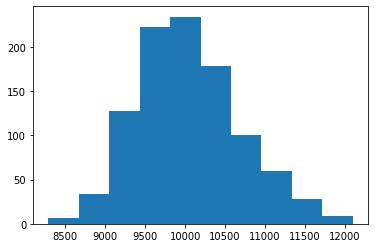

In [67]:

plt.hist(hyp_results[0]) #you can also add int to specify how many intervals there should be in the histogram.
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

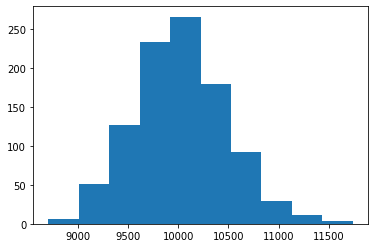

In [63]:
plt.hist(hyp_results[1])
plt.show


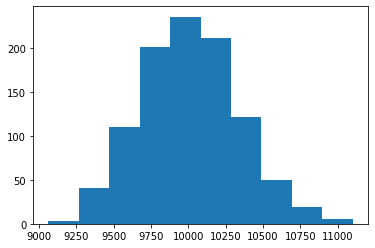

In [64]:
plt.hist(hyp_results[2])
plt.show()

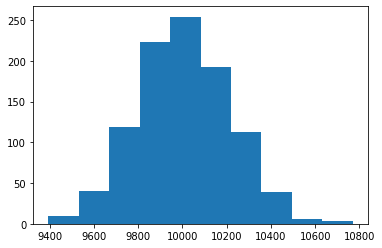

In [65]:
plt.hist(hyp_results[3])
plt.show()


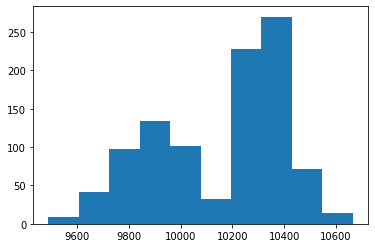

In [66]:
plt.hist(hyp_results[4])
plt.show()